<a href="https://colab.research.google.com/github/foryoudrizzle14/AI-/blob/main/5%EC%A3%BC%EC%B0%A8_%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# 데이터 준비
data = [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0]

# 하이퍼파라미터 설정
sequence_length = 3  # 입력 시퀀스 길이
input_size = 1       # 입력 크기
hidden_size = 10     # 은닉층 크기
output_size = 1      # 출력 크기
num_layers = 1       # RNN 레이어 수
learning_rate = 0.01
num_epochs = 200

In [ ]:
# 데이터셋 생성
def create_sequences(data, sequence_length):
    xs = []
    ys = []
    for i in range(len(data) - sequence_length):
        x = data[i:i+sequence_length] # [0 : 3]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return torch.tensor(xs, dtype=torch.float32), torch.tensor(ys, dtype=torch.float32)

x_data, y_data = create_sequences(data, sequence_length)

print(x_data, '\n',y_data)

tensor([[1., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 1.],
        [1., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.]]) 
 tensor([0., 0., 1., 1., 0., 0., 1., 0., 0.])


In [ ]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size) # 초기 은닉 레이어 생성
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
# 모델 초기화
model = SimpleRNN(input_size, hidden_size, output_size, num_layers)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# 입력 데이터를 3차원 텐서로 변환 (배치 크기, 시퀀스 길이, 입력 크기)
x_data = x_data.view(-1, sequence_length, input_size)

In [ ]:
# 모델 학습
for epoch in range(num_epochs):
    model.train()
    outputs = model(x_data)
    optimizer.zero_grad()
    loss = criterion(outputs, y_data.view(-1, 1))
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [20/200], Loss: 0.1461
Epoch [40/200], Loss: 0.0956
Epoch [60/200], Loss: 0.0801
Epoch [80/200], Loss: 0.0671
Epoch [100/200], Loss: 0.0585
Epoch [120/200], Loss: 0.0559
Epoch [140/200], Loss: 0.0556
Epoch [160/200], Loss: 0.0556
Epoch [180/200], Loss: 0.0556
Epoch [200/200], Loss: 0.0556


In [ ]:
model.eval()
with torch.no_grad():
    test_input = torch.tensor(data[-sequence_length:], dtype=torch.float32).view(1, sequence_length, input_size)
    predicted = model(test_input)
    print(f'Predicted next value: {predicted.item():.4f}')



Predicted next value: 1.0001


In [ ]:
test_input

tensor([[[1.],
         [0.],
         [0.]]])

In [ ]:
print(x_data, '\n',y_data)

tensor([[[1.],
         [0.],
         [1.]],

        [[0.],
         [1.],
         [0.]],

        [[1.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [1.]],

        [[0.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [0.]],

        [[1.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [1.]],

        [[0.],
         [1.],
         [0.]]]) 
 tensor([0., 0., 1., 1., 0., 0., 1., 0., 0.])


CIFAR-10

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
# CIFAR-10 데이터셋 로드 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
batch_size = 64

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 170498071/170498071 [00:02<00:00, 73271693.85it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# CNN 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



In [ ]:
# 모델 초기화
model = SimpleCNN()

# 손실 함수 및 최적화 기법 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# 모델 학습 함수
def train(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
                running_loss = 0.0

In [ ]:
# 모델 평가 함수
def evaluate(model, test_loader, criterion):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        test_loss = 0.0
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            predicted = outputs.argmax(dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        print(f'Accuracy of the model on the test images: {accuracy:.2f}%')
        print(f'Test Loss: {test_loss / len(test_loader):.4f}')


In [ ]:
# 하이퍼파라미터 설정
num_epochs = 2
batch_size = 64
learning_rate = 0.001

# 모델 학습
train(model, train_loader, criterion, optimizer, num_epochs)

# 모델 평가
evaluate(model, test_loader, criterion)

Epoch [1/2], Step [100/782], Loss: 2.4566
Epoch [1/2], Step [200/782], Loss: 2.3036
Epoch [1/2], Step [300/782], Loss: 2.3036
Epoch [1/2], Step [400/782], Loss: 2.3032
Epoch [1/2], Step [500/782], Loss: 2.3034
Epoch [1/2], Step [600/782], Loss: 2.3036
Epoch [1/2], Step [700/782], Loss: 2.3038
Epoch [2/2], Step [100/782], Loss: 2.3030
Epoch [2/2], Step [200/782], Loss: 2.3041
Epoch [2/2], Step [300/782], Loss: 2.3028
Epoch [2/2], Step [400/782], Loss: 2.3040
Epoch [2/2], Step [500/782], Loss: 2.3036
Epoch [2/2], Step [600/782], Loss: 2.3036
Epoch [2/2], Step [700/782], Loss: 2.3036
Accuracy of the model on the test images: 10.00%
Test Loss: 2.3031


In [ ]:
import numpy as np
def imshow(img):
    img = img / 2 + 0.5  # 정규화 복원
    npimg = img.numpy()
    plt.figure(figsize = (3,3))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
def test_image():

  batch = next(iter(test_loader))
  i = np.random.randint(63)
  X = batch[0][i]
  y = batch[1][i]

  outputs = model(X)
  predicted = outputs.argmax(dim=1)

  imshow(X)
  print(f'pred : {classes[predicted.item()]}, label : {classes[y.item()]}')

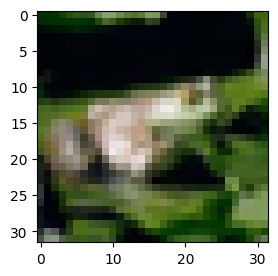

pred : dog, label : frog


In [ ]:
test_image()